In [1]:
from sklearn.datasets import load_digits
digits = load_digits()

In [2]:
# Print to show there are 1797 images (8 by 8 images for a dimensionality of 64)
print('Image Data Shape' , digits.data.shape)
# Print to show there are 1797 labels (integers from 0–9)
print("Label Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


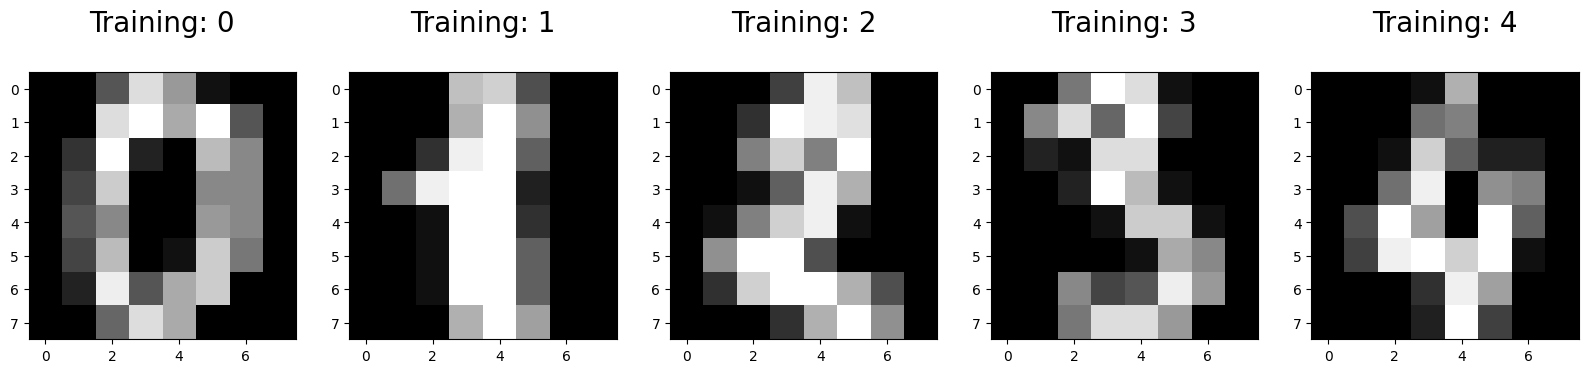

In [3]:
import numpy as np 
import matplotlib.pyplot as plt
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
 plt.subplot(1, 5, index + 1)
 plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
 plt.title('Training: %i\n' % label, fontsize = 20)

In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=0)

In [5]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()


In [6]:
import sys

sys.path.append('../')
from mlflow_emissions_sdk.experiment_tracking_training import EmissionsTrackerMlflow

tracker_info = {
    "tracking_uri" : "http://127.0.0.1:5000",
    "experiment_name" : "sklearn_exp",
    "run_name" : "LogisticRegression",
    "flavor" : 'sklearn'
}

runner = EmissionsTrackerMlflow()
runner.read_params(tracker_info)
runner.start_training_job()

logisticRegr.fit(x_train, y_train)

runner.end_training_job()
runner.accuracy_per_emission(logisticRegr, x_test, y_test)


[codecarbon INFO @ 16:13:26] [setup] RAM Tracking...
[codecarbon INFO @ 16:13:26] [setup] GPU Tracking...
[codecarbon INFO @ 16:13:26] No GPU found.
[codecarbon INFO @ 16:13:26] [setup] CPU Tracking...
[codecarbon WARNING @ 16:13:26] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 16:13:26] We saw that you have a Apple M2 Pro but we don't know it. Please contact us.
[codecarbon INFO @ 16:13:26] CPU Model on constant consumption mode: Apple M2 Pro
[codecarbon INFO @ 16:13:26] >>> Tracker's metadata:
[codecarbon INFO @ 16:13:26]   Platform system: macOS-14.0-arm64-arm-64bit
[codecarbon INFO @ 16:13:26]   Python version: 3.11.6
[codecarbon INFO @ 16:13:26]   CodeCarbon version: 2.3.1
[codecarbon INFO @ 16:13:26]   Available RAM : 16.000 GB
[codecarbon INFO @ 16:13:26]   CPU count: 10
[codecarbon INFO @ 16:13:26]   CPU model: Apple M2 Pro
[codecarbon INFO @ 16:13:26]   GPU count: None
[codecarbon INFO @ 16:13:26]   GPU model: None
2023/10/26 16:13:29 WA